# Problem Statement
## Whether the client has subscribed a term deposit or not

### Steps involved
#### Data Collection
#### Preprocessing the Data
#### EDA
#### Analysing the Model

In [1]:
#### Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Creating Dataframe
df = pd.read_csv('/Users/ag/Downloads/bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### From the above table in age column there is a huge gap between 75% and Max there are chances of outliers
#### From the above table in balance column there is a huge gap between 25%, 50%, 75% and Max there are chances of outliers
#### From the above table in duration column there is a huge gap between 75% and Max there are chances of outliers
#### From the above table in campaign column there is a huge gap between 75% and Max there are chances of outliers
#### From the above table in pdays column there is a huge gap between 75% and Max there are chances of outliers
#### From the above table in previous column there is a huge gap between 75% and Max there are chances of outliers

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df[df.duplicated()].shape

(0, 17)

## Correlation, Skewness and Kurtosis

In [9]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

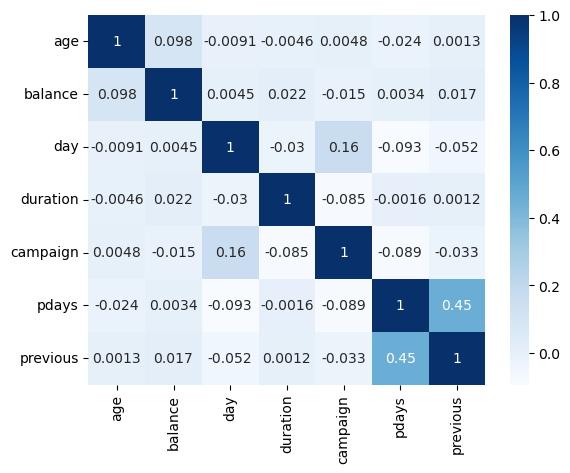

In [10]:
#Plotting a Correlation plot
sns.heatmap(df.corr(), cmap="Blues", annot=True)

### Most of the data is independent as the data is Near Zero

In [11]:
df.skew()

/var/folders/qh/d05j4cdj63z5gxf9gdvz340c0000gn/T/ipykernel_27376/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [12]:
df.kurtosis()

/var/folders/qh/d05j4cdj63z5gxf9gdvz340c0000gn/T/ipykernel_27376/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


age            0.319570
balance      140.751547
day           -1.059897
duration      18.153915
campaign      39.249651
pdays          6.935195
previous    4506.860660
dtype: float64

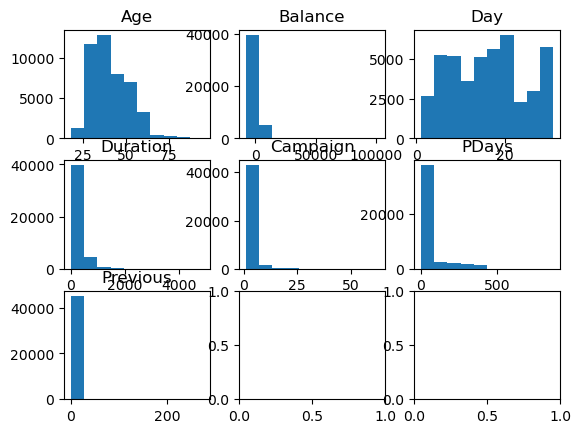

<Figure size 640x480 with 0 Axes>

In [13]:
fig,a = plt.subplots(3,3) 
a[0][0].hist('age', data = df)
a[0][0].set_title('Age')
a[0][1].hist('balance', data = df)
a[0][1].set_title('Balance')
a[0][2].hist('day', data = df)
a[0][2].set_title('Day')
a[1][0].hist('duration', data = df)
a[1][0].set_title('Duration')
a[1][1].hist('campaign', data = df)
a[1][1].set_title('Campaign')
a[1][2].hist('pdays', data = df)
a[1][2].set_title('PDays')
a[2][0].hist('previous', data = df)
a[2][0].set_title('Previous')
plt.show()
plt.tight_layout()

#### Age has Postive Skewness and Kurtosis
#### Balance has Postive Skewness and Kurtosis
#### Day has Positive Skewness and Negative Kurtosis
#### Duration has Postive Skewness and Kurtosis
#### Campaign has Postive Skewness and Kurtosis
#### Pdays has Postive Skewness and Kurtosis
#### Previous has Postive Skewness and Kurtosis

In [14]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

<AxesSubplot:xlabel='age'>

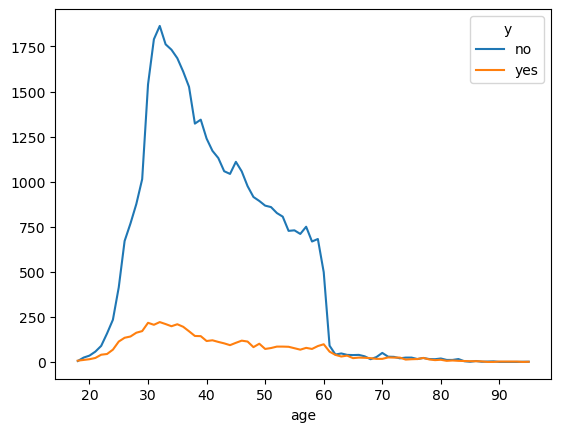

In [15]:
pd.crosstab(df['age'], df.y).plot()

#### Most people who has not subscribed to loan are in the range of 30 to 50 years 

<AxesSubplot:xlabel='marital'>

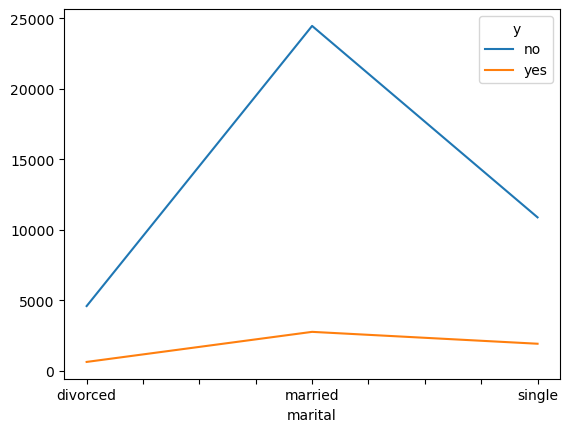

In [16]:
pd.crosstab(df['marital'], df['y']).plot()

#### Highest Number of people who has not subscribed for Term Deposit are Married people

<AxesSubplot:ylabel='previous'>

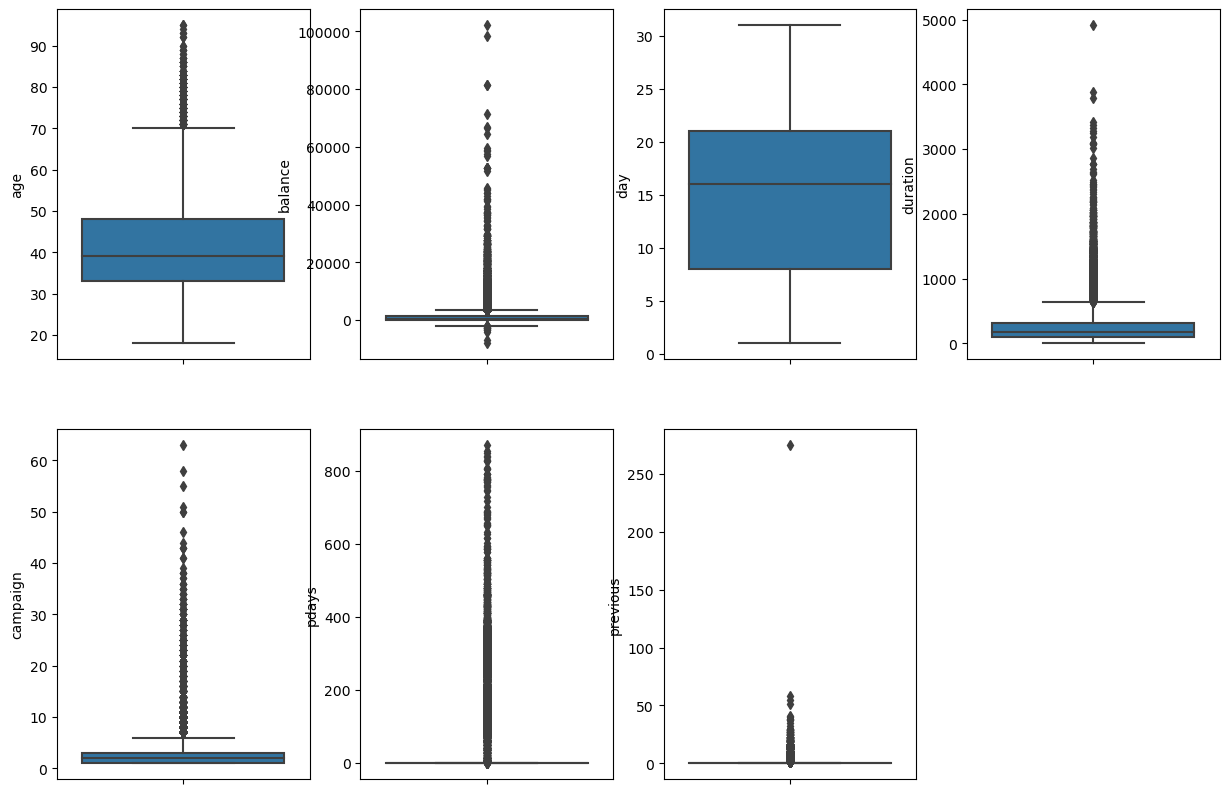

In [17]:
# creating boxplots for all the continuous columns of the dataframe
plt.figure(figsize=(15,10))
plt.subplot(2,4,1)
sns.boxplot(y='age',data=df)
plt.subplot(2,4,2)
sns.boxplot(y='balance',data=df)
plt.subplot(2,4,3)
sns.boxplot(y='day',data=df)
plt.subplot(2,4,4)
sns.boxplot(y='duration',data=df)
plt.subplot(2,4,5)
sns.boxplot(y='campaign',data=df)
plt.subplot(2,4,6)
sns.boxplot(y='pdays',data=df)
plt.subplot(2,4,7)
sns.boxplot(y='previous',data=df)

#### For Age plot the data has a median of around 40 and there are outlier on the upper part of the graph
#### For Balance plot the data has a median of around 1000.
#### For day the median is around 15 and there are not outliers
#### For Campaign plot the median is around 2, There are outlier on the upper side of the graph
#### For Pdays plot the median is around 0, There are outlier on the upper side of the graph
#### For Previous plot the median is around 0, There are outlier on the upper side of the graph

In [18]:
# Checking for Missing Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<AxesSubplot:>

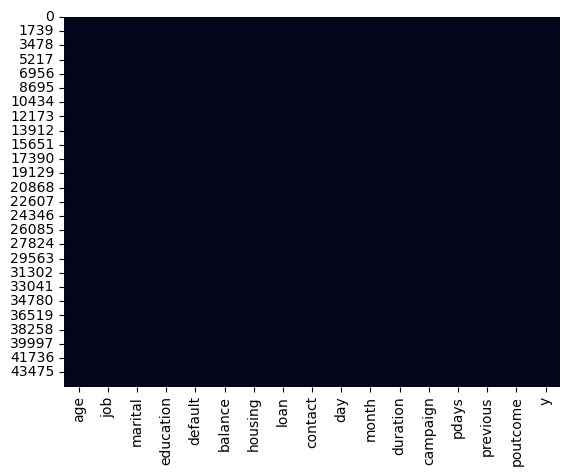

In [19]:
# PLotting Heatmap for missing values
sns.heatmap(df.isnull(), cbar=False)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
# Making a DataFrame for Categorical Variables
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [22]:
# Getting Dummies
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [23]:
# Concatting original df and Dummies and Making a New Df
df1 = pd.concat([df,dummies],axis=1)

In [24]:
df1.shape

(45211, 53)

In [25]:
# Dropping Categorical features
df1.drop(columns=categorical.columns,axis=1,inplace=True)

In [26]:
#Splitting the data into X and y Variables
X = df1.drop(columns=['y_yes'])
y = df1.y_yes

In [27]:
#Splitting the Data in Train and Test using Sklearn
from sklearn.model_selection import train_test_split

In [28]:
#Splitting the Data into 80% Train and 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [29]:
# Checking the Shape of X_train, X_test,, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36168, 42), (9043, 42), (36168,), (9043,))

In [30]:
#Using MinMaxscaler for Normalising the data
from sklearn.preprocessing import MinMaxScaler
scaled = MinMaxScaler()
X_train_scaled = scaled.fit_transform(X_train)
X_test_scaled = scaled.fit_transform(X_test)

## Model Preparation

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(max_iter = 100000)

In [33]:
# Fitting the Model
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=100000)

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
#Confusion Matrix for model accuracy
confusion_matrix(y_test, y_pred)

array([[7648,  348],
       [ 498,  549]])

/Users/ag/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


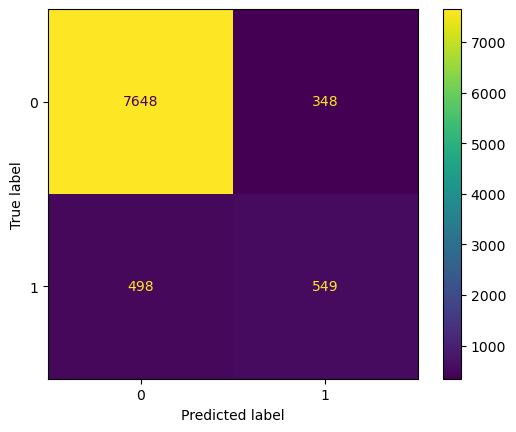

In [37]:
# Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test_scaled, y_test)  
plt.show()

In [38]:
model.score(X_train_scaled, y_train)*100

90.06856890068569

In [39]:
model.score(X_test_scaled, y_test)*100

90.64469755612076

Text(0, 0.5, 'True Positive Rate')

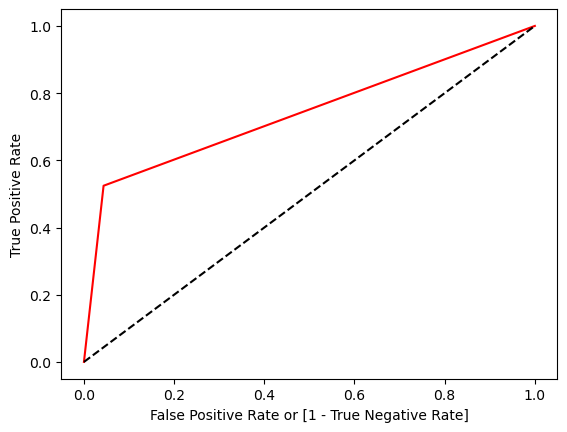

In [40]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [41]:
auc

0.7404167699895794

## Using Minmaxscaler for Transforming the data we got an accuracy of 90% for train_df and 91% for test_df

In [44]:
# Using StandardScaler for Normalizing the Data
from sklearn.preprocessing import StandardScaler

In [45]:
Scaler = StandardScaler()

In [46]:
model1 = LogisticRegression(max_iter = 100000)

In [47]:
X_train_scaler = Scaler.fit_transform(X_train)
X_test_scaler = Scaler.fit_transform(X_test)

In [48]:
model1.fit(X_train_scaler, y_train)

LogisticRegression(max_iter=100000)

In [49]:
y_pred1 = model1.predict(X_test_scaler)

In [50]:
#Confusion Matrix for model_accuracy
Model1_cm = confusion_matrix(y_test, y_pred1)

In [51]:
Model1_cm

array([[7823,  173],
       [ 667,  380]])

/Users/ag/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


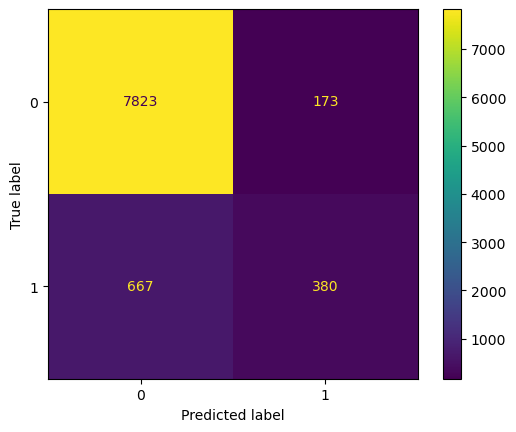

In [52]:
#Plotting a confusion Matrix for model_accuracy
plot_confusion_matrix(model1, X_test_scaler, y_test)  
plt.show()

In [53]:
model1.score(X_train_scaler, y_train)*100

90.07133377571334

In [54]:
model1.score(X_test_scaler, y_test)*100

90.7110472188433

Text(0, 0.5, 'True Positive Rate')

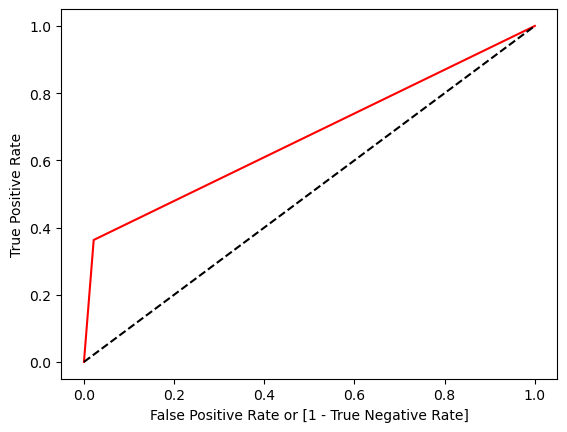

In [55]:
#ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

auc = roc_auc_score(y_test, y_pred1)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [56]:
auc

0.6706529601954749

## Using Minmaxscaler for Transforming the data we got an accuracy of 90% for train_df and 91% for test_df